In [1]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Putting two tables together

df_products = pd.read_csv('amazon_products.csv')
df_categories = pd.read_csv('amazon_categories.csv')

df = pd.concat([df_products,df_categories], axis=1)

In [3]:
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,1.0,Beading & Jewelry Making
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,2.0,Fabric Decorating
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,3.0,Knitting & Crochet Supplies
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,4.0,Printmaking Supplies
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,5.0,Scrapbooking & Stamping Supplies


In [4]:
#checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426337 entries, 0 to 1426336
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  id                 248 non-null      float64
 12  category_name      248 non-null      object 
dtypes: bool(1), float64(4), int64(3), object(5)
memory usage: 142.8+ MB


In [5]:
#checking null values

df.isnull().sum()

asin                       0
title                      1
imgUrl                     0
productURL                 0
stars                      0
reviews                    0
price                      0
listPrice                  0
category_id                0
isBestSeller               0
boughtInLastMonth          0
id                   1426089
category_name        1426089
dtype: int64

In [6]:
#checking if there's any duplicated values

df.duplicated().sum()

0

In [7]:
#Showing mean price by category

avg_category_price = df.groupby('category_name')['price'].mean()
avg_category_price.head(5)

category_name
Abrasive & Finishing Products      149.99
Accessories & Supplies              22.79
Additive Manufacturing Products     18.99
Arts & Crafts Supplies             144.79
Arts, Crafts & Sewing Storage      112.63
Name: price, dtype: float64

In [8]:
#Counting best selling products vs not best selling products

df['isBestSeller'].value_counts()

False    1417817
True        8520
Name: isBestSeller, dtype: int64

In [9]:
#Showing best selling products

best_selling = df[df['isBestSeller']]
best_selling

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
924,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,https://m.media-amazon.com/images/I/513fraGQXW...,https://www.amazon.com/dp/B00W66LQFO,4.6,0,18.48,26.00,110,True,10000,NaN,NaN
925,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,https://www.amazon.com/dp/B0C4RMF5PZ,4.8,0,40.00,0.00,110,True,4000,NaN,NaN
933,B077ZMKWVM,"Men's Crew T-Shirts, Multipack, Style G1100",https://m.media-amazon.com/images/I/61Zf5AAGPW...,https://www.amazon.com/dp/B077ZMKWVM,4.6,0,18.99,0.00,110,True,8000,NaN,NaN
938,B07PH2VWX1,"Men's Coolzone Boxer Briefs, Moisture Wicking ...",https://m.media-amazon.com/images/I/81lHfvvXK0...,https://www.amazon.com/dp/B07PH2VWX1,4.6,0,19.59,24.49,110,True,5000,NaN,NaN
944,B01D2GRTIE,Men's Multi-Pack Mesh Ventilating Comfort Fit ...,https://m.media-amazon.com/images/I/61lxpudqRp...,https://www.amazon.com/dp/B01D2GRTIE,4.6,0,14.99,0.00,110,True,6000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415016,B0007LCLPE,Pyle 2Way Custom Component Speaker System-6.5”...,https://m.media-amazon.com/images/I/812gPYS6xm...,https://www.amazon.com/dp/B0007LCLPE,4.0,0,44.99,47.99,26,True,0,NaN,NaN
1415072,B004S50ZB2,BOSS Audio Systems R1002 Riot Series Car Stere...,https://m.media-amazon.com/images/I/610Vz6PUFl...,https://www.amazon.com/dp/B004S50ZB2,4.1,0,35.41,56.00,26,True,0,NaN,NaN
1416949,B0BZVV2N8N,"Pickleball Paddles, USAPA Approved Fiberglass ...",https://m.media-amazon.com/images/I/71WQNbP6dW...,https://www.amazon.com/dp/B0BZVV2N8N,4.8,0,35.99,0.00,198,True,300,NaN,NaN
1416996,B00HR1NBWE,Skechers Men's Afterburn M. Fit,https://m.media-amazon.com/images/I/81ivYs9jxt...,https://www.amazon.com/dp/B00HR1NBWE,4.4,0,40.00,74.00,198,True,200,NaN,NaN


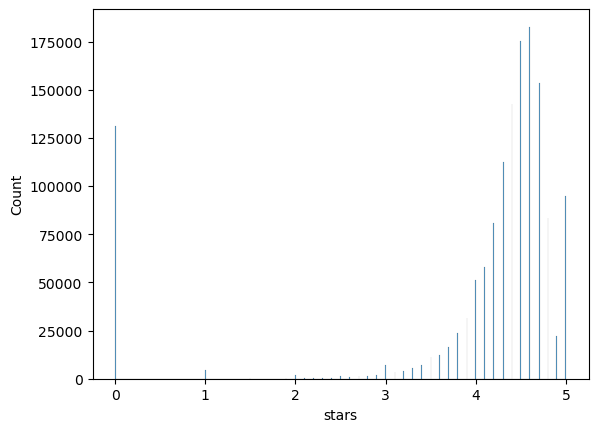

In [10]:
#Plotting counts of ratings

sns.histplot(data=df,x='stars');

In [11]:
avg_price = df.groupby('category_name')['price'].mean().reset_index()
avg_price.columns = ['Category', 'Average Price']

[Text(0.5, 1.0, 'Average Price by 10 Categories')]

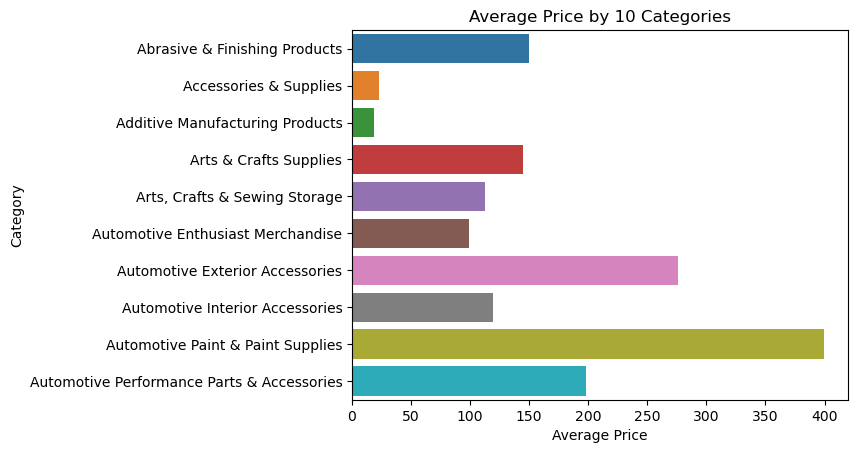

In [12]:
#Data visualization

sns.barplot(data=avg_price.head(10), x='Average Price', y='Category').set(title='Average Price by 10 Categories')

In [13]:
avg_rate = df.groupby('category_name')['stars'].mean().reset_index()
avg_rate.columns = ['Category', 'Average Rating']

[Text(0.5, 1.0, 'Average Rating by 10 Categories')]

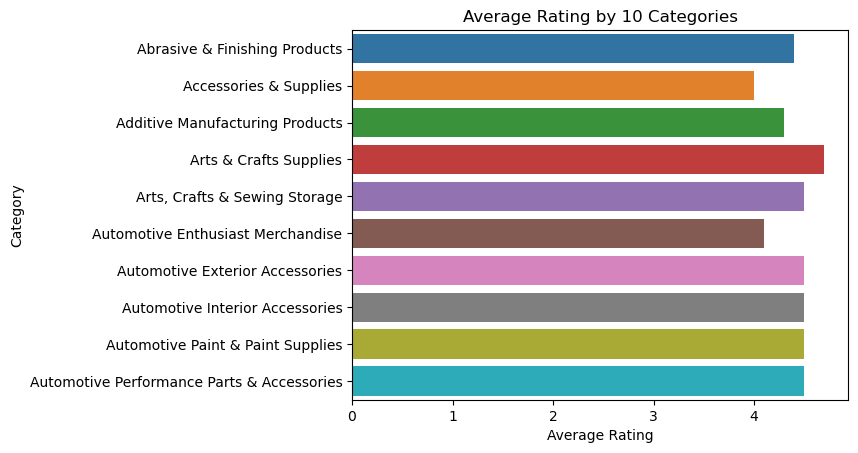

In [14]:
#Data visualization

sns.barplot(data=avg_rate.head(10), x='Average Rating', y='Category').set(title='Average Rating by 10 Categories')

In [55]:
#Selecting predictor variables and a response variable

X = df[['reviews','price']]
y = df['isBestSeller']

In [56]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [57]:
#Importing metrics and logistic regression 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('always')

In [58]:
#Fitting the model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
#Predict the model

prediction = model.predict(X_test)

In [60]:
#Evaluate the model 

print(accuracy_score(y_test,prediction))

0.9939051465055083


In [61]:
print('Confusion Matrix: \n', confusion_matrix(y_test,prediction))

Confusion Matrix: 
 [[425278     35]
 [  2573     16]]


In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00    425313
        True       0.31      0.01      0.01      2589

    accuracy                           0.99    427902
   macro avg       0.65      0.50      0.50    427902
weighted avg       0.99      0.99      0.99    427902



In [71]:
new_data = pd.DataFrame({'reviews': [0], 'price': [20]})
y_pred_new = model.predict(new_data)
print(f'Prediction: {y_pred_new}')

Prediction: [False]
